In [1]:
import math
import numpy
import boxkit
import matplotlib.pyplot as pyplot

In [2]:
dataset_blocks=boxkit.api.read.dataset("/Users/Akash/Box/Jarvis-DataShare/Bubble-Box-Sample/boiling-earth/heater2D/blocks/INS_Pool_Boiling_Heater_hdf5_0030")
dataset_oneblk=boxkit.api.read.dataset("/Users/Akash/Box/Jarvis-DataShare/Bubble-Box-Sample/boiling-earth/heater2D/oneblk/INS_Pool_Boiling_Heater_hdf5_0030")

In [3]:
def plot_phi(dataset):
    pyplot.figure()
    pyplot.rc("font", family="serif", size=14, weight="bold")
    pyplot.rc("axes", labelweight="bold", titleweight="bold")
    pyplot.rc("text", usetex=True)
    for block in dataset.blocklist:
        xmesh, ymesh = numpy.meshgrid(numpy.linspace(block.xmin + block.dx/2, block.xmax - block.dx/2, block.nxb), numpy.linspace(block.zmin - block.dz/2, block.zmax + block.dz/2, block.nzb))
        pyplot.contour(xmesh.transpose(), ymesh.transpose(), block["phi"][:,0,:], levels=[0])
    pyplot.axis('equal')
    pyplot.tight_layout()
    pyplot.xlim([-5, 5])
    pyplot.ylim([-5, 5])
    pyplot.show()

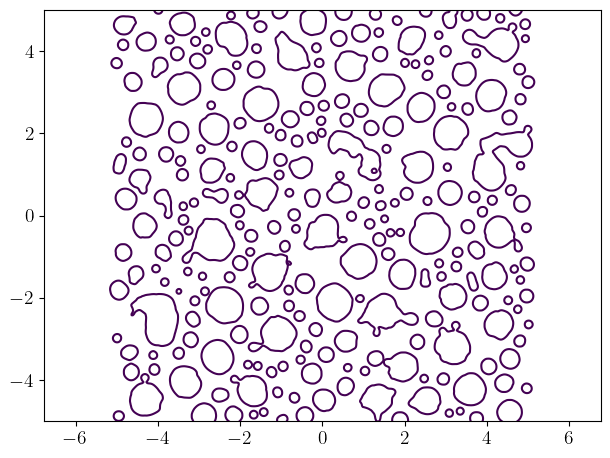

In [4]:
plot_phi(dataset_oneblk)

/tmp/ipykernel_11575/3003131995.py:8: UserWarning: No contour levels were found within the data range.
  pyplot.contour(xmesh.transpose(), ymesh.transpose(), block["phi"][:,0,:], levels=[0])


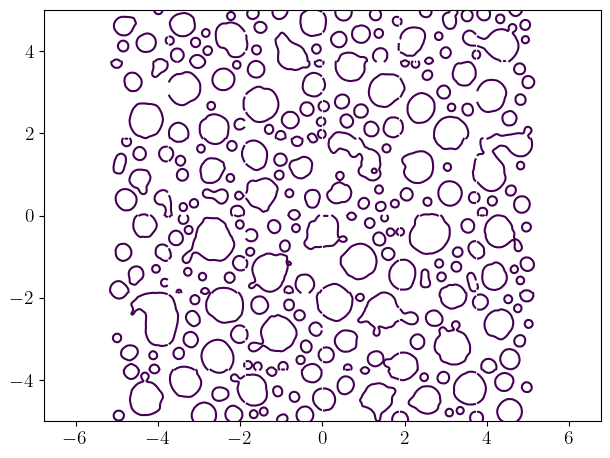

In [5]:
plot_phi(dataset_blocks)

In [6]:
reshaped_dataset=boxkit.api.create.reshaped_dataset(dataset_blocks, "phi", nthreads=2)

run-loky:boxkit.api.create._reshape_block


100%|██████████| 64/64 [00:00<00:00, 65.16it/s]


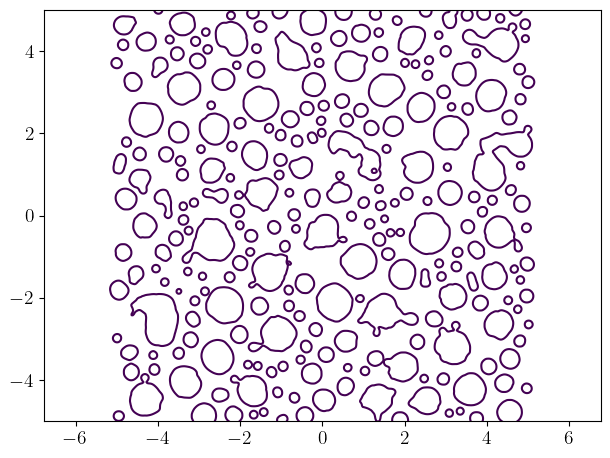

In [7]:
plot_phi(reshaped_dataset)